**Goal:** Is to develop a machine learning approach to make predictions on the House Price which is a regression task.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (22, 10)

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

# Exploratory Data Analysis & Pre-processing

In [2]:
dataPath = '/home/daniel/Desktop/programming/pythondatascience/datascience/c_sharp/learn_resources/C-sharp-tutorials/laptop-price-prediction/src/LaptopPriceTrainer'
olddata = pd.read_csv(os.path.join(dataPath,'laptoppricesUS.csv'), delimiter='\t')
olddata.head()

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price
0,i5,1.8,intel,4,ddr3,13.3,128,True,1.4,527
1,i5,2.5,intel,4,ddr3,13.3,500,False,2.0,527
2,i5,2.5,intel,8,ddr3,13.3,500,False,2.0,558
3,i5,1.4,intel,4,ddr3,11.6,128,True,1.0,485
4,i5,1.3,intel,4,ddr3,11.6,128,True,1.0,421


In [3]:
# data.to_csv('laptoppricesnew.csv')
data = pd.read_csv(os.path.join(dataPath,'laptoppricesnew.csv'), index_col=0)
print(data.shape)
print(data.info())
data.head()

(469, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 468
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CPU      469 non-null    object 
 1   GHz      469 non-null    float64
 2   GPU      469 non-null    object 
 3   RAM      469 non-null    int64  
 4   RAMType  469 non-null    object 
 5   Screen   469 non-null    float64
 6   Storage  469 non-null    int64  
 7   SSD      469 non-null    bool   
 8   Weight   469 non-null    float64
 9   Price    469 non-null    int64  
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 37.1+ KB
None


,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight,Price
0,i5,1.8,intel,4,ddr3,13.3,128,True,1.4,527
1,i5,2.5,intel,4,ddr3,13.3,500,False,2.0,527
2,i5,2.5,intel,8,ddr3,13.3,500,False,2.0,558
3,i5,1.4,intel,4,ddr3,11.6,128,True,1.0,485
4,i5,1.3,intel,4,ddr3,11.6,128,True,1.0,421


# Target Exploration (Price)

In [6]:
data.groupby('Price').first()

,CPU,GHz,GPU,RAM,RAMType,Screen,Storage,SSD,Weight
Price,,,,,,,,,
157,i3,2.4,intel,4,ddr3,13.0,500,False,1.70
158,i5,2.5,intel,4,ddr3,14.0,320,False,2.00
181,i5,2.6,intel,4,ddr3,14.0,320,False,2.33
199,i3,2.4,intel,4,ddr3,13.0,500,False,1.70
210,i5,2.5,intel,4,ddr3,14.0,128,True,2.13
...,...,...,...,...,...,...,...,...,...
1310,i7,2.6,nvidia,16,ddr4,15.0,512,True,2.00
1470,i7,2.6,nvidia,16,ddr4,15.0,512,True,2.50
1581,i7,2.6,intel,8,ddr4,15.6,240,False,2.60


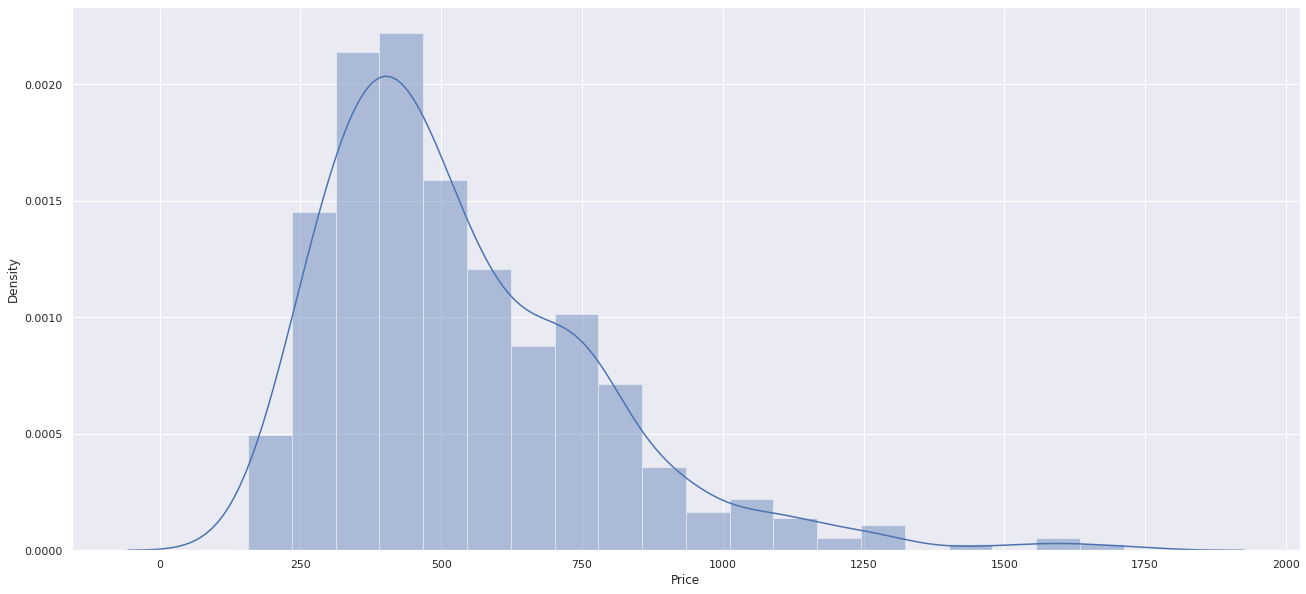

In [6]:
sns.distplot(data.Price)
plt.show()

The Price column follows near a **Guassian distribution**

# Check for Missing Values

In [4]:
data.isnull().sum()

CPU        0
GHz        0
GPU        0
RAM        0
RAMType    0
Screen     0
Storage    0
SSD        0
Weight     0
Price      0
dtype: int64

# Check for Outliers

In [5]:
data.describe()

,GHz,RAM,Screen,Storage,Weight,Price
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,2.240085,8.904051,13.627505,221.466951,1.717846,533.867804
std,0.361521,4.304808,1.140939,117.663423,0.495570,243.604309
min,1.100000,4.000000,11.000000,120.000000,0.900000,157.000000
25%,2.200000,8.000000,12.500000,128.000000,1.400000,358.000000
50%,2.300000,8.000000,14.000000,180.000000,1.600000,474.000000
75%,2.500000,8.000000,14.000000,256.000000,1.900000,664.000000
max,3.100000,32.000000,17.300000,750.000000,3.460000,1712.000000
